In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error



c:\Users\karim\AppData\Local\Programs\Python\Python313\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


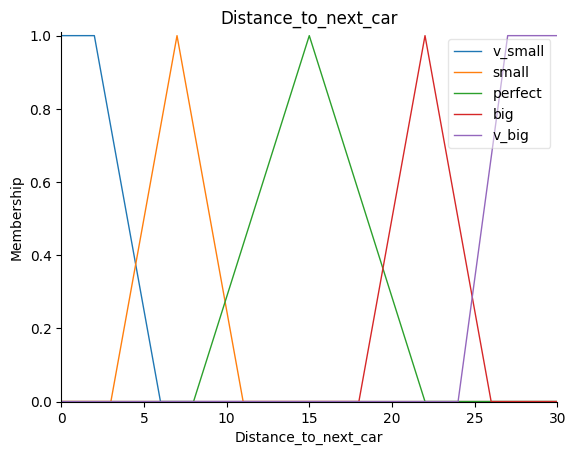

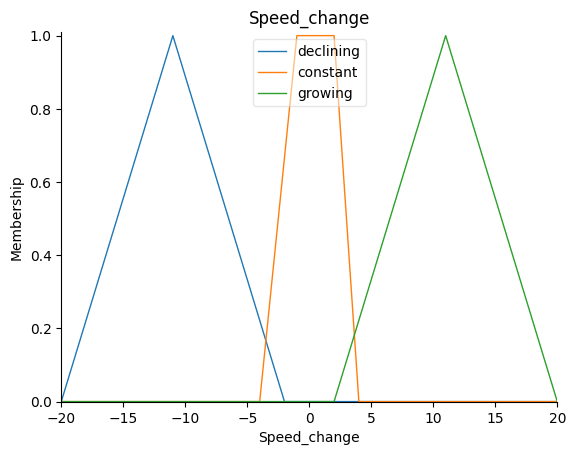

In [2]:
# Exercice 1. 
distance = ctrl.Antecedent(np.arange(0, 31, 1), 'Distance_to_next_car')

distance['v_small'] = fuzz.trapmf(distance.universe, [0, 0, 2,6])
distance['small'] = fuzz.trimf(distance.universe, [3, 7, 11])
distance['perfect'] = fuzz.trimf(distance.universe, [8, 15, 22])
distance['big'] = fuzz.trimf(distance.universe, [18, 22, 26])
distance['v_big'] = fuzz.trapmf(distance.universe, [24, 27, 30, 30])

distance.view()
plt.title("Distance_to_next_car")
plt.show()

# Exercice 2. 
speed = ctrl.Antecedent(np.arange(-20, 21, 1), 'Speed_change')

speed['declining'] = fuzz.trimf(speed.universe, [-20, -11, -2])
speed['constant'] = fuzz.trapmf(speed.universe, [-4, -1,2, 4])
speed['growing'] = fuzz.trimf(speed.universe, [2, 11, 20])

speed.view()
plt.title("Speed_change")
plt.show()


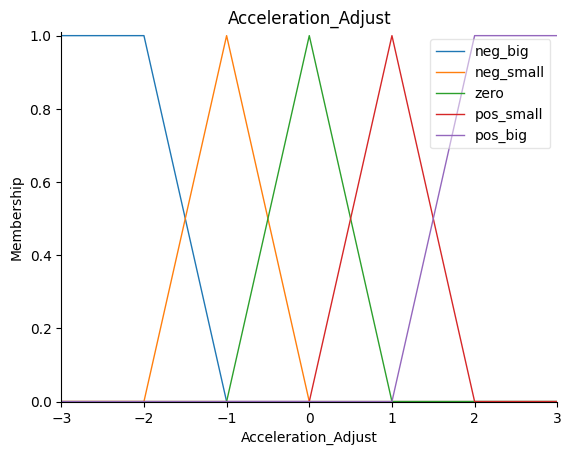

In [3]:
# Exercice 3. 
acc = ctrl.Consequent(np.arange(-3, 4, 1), 'Acceleration_Adjust')

acc['neg_big'] = fuzz.trapmf(acc.universe, [-3, -3, -2, -1])
acc['neg_small'] = fuzz.trimf(acc.universe, [-2, -1, 0])
acc['zero'] = fuzz.trimf(acc.universe, [-1, 0, 1])
acc['pos_small'] = fuzz.trimf(acc.universe, [0, 1, 2])
acc['pos_big'] = fuzz.trapmf(acc.universe, [1, 2, 3, 3])

acc.view()
plt.title("Acceleration_Adjust")
plt.show()


Résultat défuzzification Acceleration_Adjust = 0.11229909154437456


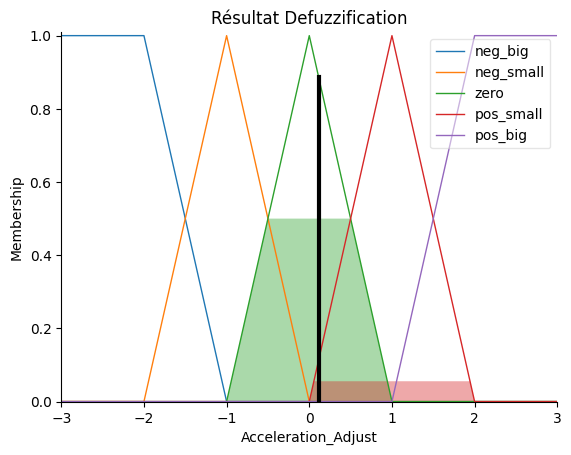

In [4]:
# Exercice 4. 
rules = [
    ctrl.Rule(distance['v_small'] & speed['declining'], acc['neg_small']),
    ctrl.Rule(distance['v_small'] & speed['constant'], acc['neg_big']),
    ctrl.Rule(distance['v_small'] & speed['growing'], acc['neg_big']),

    ctrl.Rule(distance['small'] & speed['declining'], acc['zero']),
    ctrl.Rule(distance['small'] & speed['constant'], acc['neg_small']),
    ctrl.Rule(distance['small'] & speed['growing'], acc['neg_big']),

    ctrl.Rule(distance['perfect'] & speed['declining'], acc['pos_small']),
    ctrl.Rule(distance['perfect'] & speed['constant'], acc['zero']),
    ctrl.Rule(distance['perfect'] & speed['growing'], acc['neg_small']),

    ctrl.Rule(distance['big'] & speed['declining'], acc['pos_big']),
    ctrl.Rule(distance['big'] & speed['constant'], acc['pos_small']),
    ctrl.Rule(distance['big'] & speed['growing'], acc['zero']),

    ctrl.Rule(distance['v_big'] & speed['declining'], acc['pos_big']),
    ctrl.Rule(distance['v_big'] & speed['constant'], acc['pos_big']),
    ctrl.Rule(distance['v_big'] & speed['growing'], acc['pos_small'])
]

system = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(system)


sim.input['Distance_to_next_car'] = 13
sim.input['Speed_change'] = -2.5

sim.compute()
print("Résultat défuzzification Acceleration_Adjust =", sim.output['Acceleration_Adjust'])

acc.view(sim=sim)
plt.title("Résultat Defuzzification")
plt.show()

In [5]:
n_samples = 1000
data = []

for _ in range(n_samples):
    d = np.random.uniform(0, 30) 
    s = np.random.uniform(-20, 20)  

    sim.input['Distance_to_next_car'] = d
    sim.input['Speed_change'] = s
    sim.compute()
    a = sim.output['Acceleration_Adjust']

    data.append([d, s, a])

df = pd.DataFrame(data, columns=['Distance', 'Speed_change', 'Acceleration_Adjust'])

print(df.head())


    Distance  Speed_change  Acceleration_Adjust
0   9.458395      6.896914            -1.739118
1  27.375528      6.241930             1.000000
2  13.373710    -16.481221             1.000000
3  14.581552     -4.275611             1.000000
4  28.296450     -7.983471             2.155164


In [6]:


X = df[['Distance', 'Speed_change']]
y = df['Acceleration_Adjust']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=200)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200)

In [7]:

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MAE =", mae)
print("MSE =", mse)


MAE = 0.029145941215777498
MSE = 0.0035967406889212215


- Logique floue :
  - Facilite a comprendre car les decisions se basent sur des regles (SI ... ALORS ...)
  - Capable de traiter des valeurs imprecises ou floues
  - La qualite depend directement des regles definies par l'expert humain

- Machine Learning :
  - Offrir une excellente precision grace a l'apprentissage sur les donnees
  - Le fonctionnement interne est moins clair et plus difficile a expliquer
  - Performances mesurees :
    - MAE = 0.0333
    - MSE = 0.0054
